**1 | Importing Esssential Libraries and Data Source**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 

from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

from sklearn import preprocessing # Provides several common utility functions: standardization
from sklearn.preprocessing import StandardScaler # Standardizes features by removing the mean

import cv2 as cv

import warnings
warnings.filterwarnings("ignore")

**2 | Exploratory Data Analysis**

In [13]:
data=pd.read_csv('HAM10000_metadata.csv')
data=data.drop(columns=['lesion_id'])
data.head()

,image_id,dx,dx_type,age,sex,localization
0,ISIC_0027419,bkl,histo,80.0,male,scalp
1,ISIC_0025030,bkl,histo,80.0,male,scalp
2,ISIC_0026769,bkl,histo,80.0,male,scalp
3,ISIC_0025661,bkl,histo,80.0,male,scalp
4,ISIC_0031633,bkl,histo,75.0,male,ear


2.1 | Descriptive statistics of the dataset

In [14]:
data.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image_id      10015 non-null  object 
 1   dx            10015 non-null  object 
 2   dx_type       10015 non-null  object 
 3   age           9958 non-null   float64
 4   sex           10015 non-null  object 
 5   localization  10015 non-null  object 
dtypes: float64(1), object(5)
memory usage: 469.6+ KB


2.2 | Checking For Missing Values

In [16]:
data.isnull().sum()

image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [17]:
data=data.dropna()
data.isnull().sum()

image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

2.3 | Checking for Duplicates

In [18]:
data.drop_duplicates()

,image_id,dx,dx_type,age,sex,localization
0,ISIC_0027419,bkl,histo,80.0,male,scalp
1,ISIC_0025030,bkl,histo,80.0,male,scalp
2,ISIC_0026769,bkl,histo,80.0,male,scalp
3,ISIC_0025661,bkl,histo,80.0,male,scalp
4,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...
10010,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,ISIC_0032854,akiec,histo,80.0,male,face


2.4 | Countplot for Diagnosis Distribution

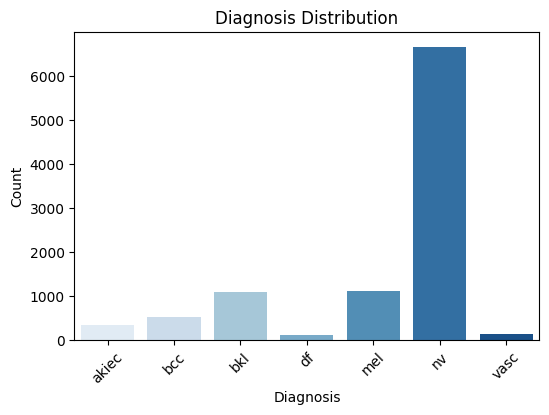

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='dx', palette='Blues', order=data['dx'].value_counts().sort_index().index)
plt.title('Diagnosis Distribution')
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

2.5 | Countplot for Localization Distribution

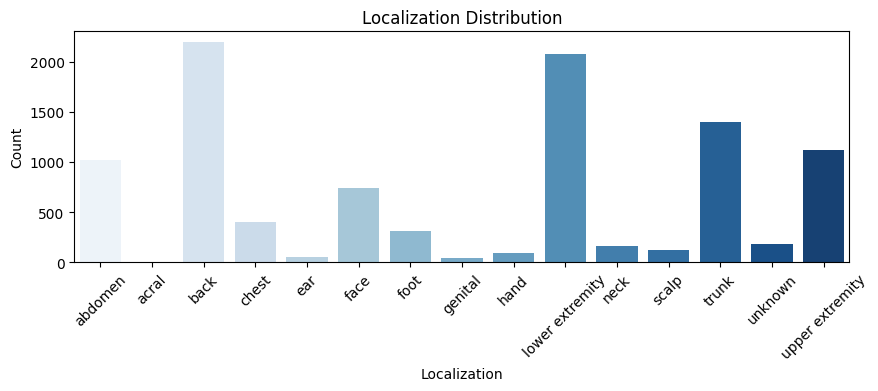

In [20]:
plt.figure(figsize=(10, 3))
sns.countplot(data=data, x='localization', palette='Blues',
              order=data['localization'].value_counts().sort_index().index)
plt.title('Localization Distribution')
plt.xlabel('Localization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**3 | DATA PRE-PROCESSING**

3.1 | Resizing Image and Converting them from BGR to RGB Format

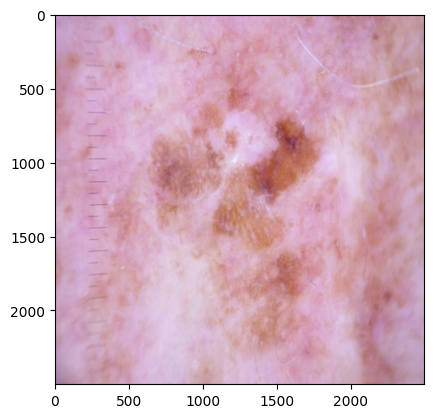

bkl


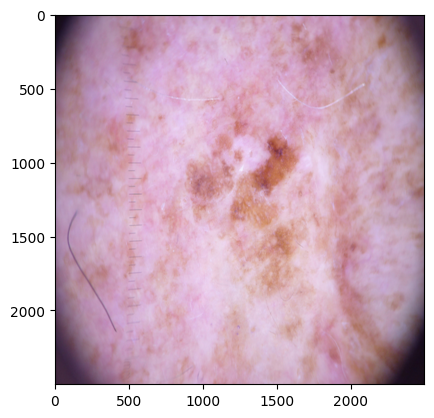

bkl


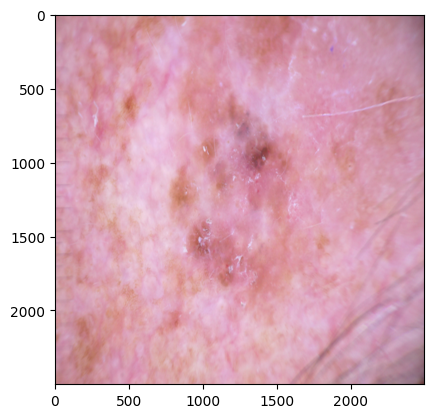

bkl


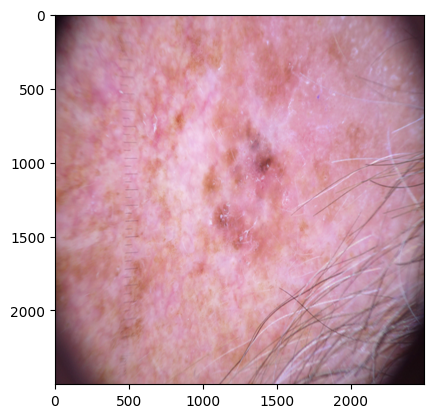

bkl


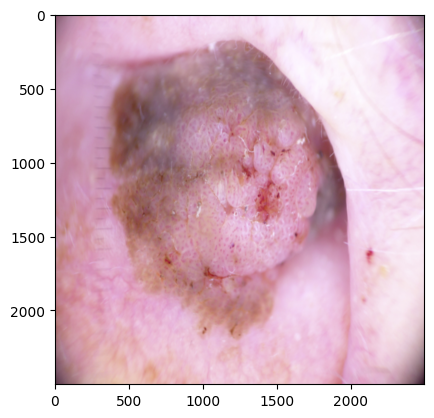

bkl


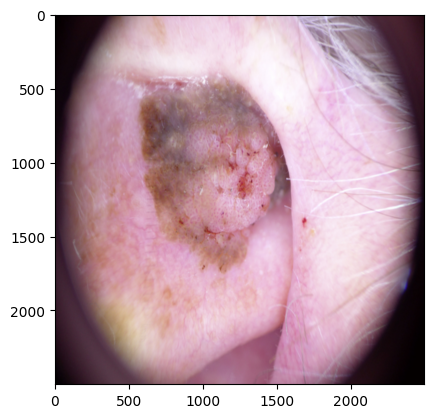

bkl


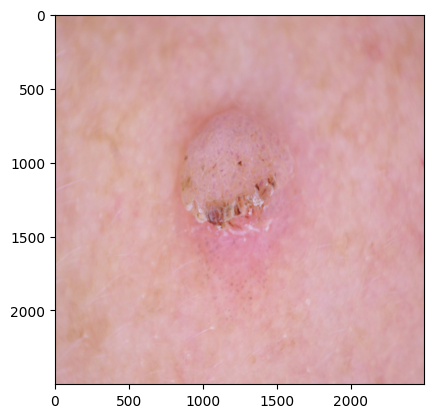

bkl


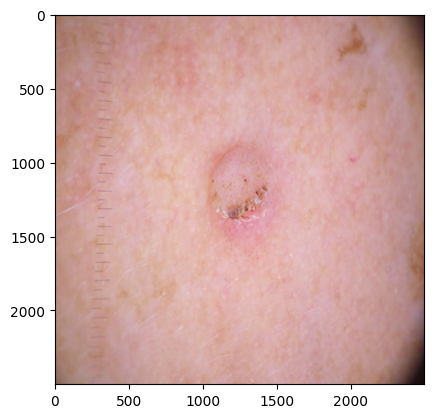

bkl


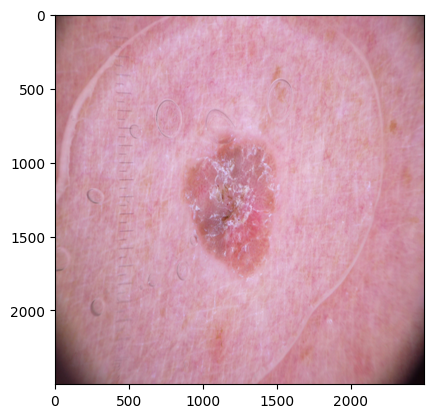

bkl


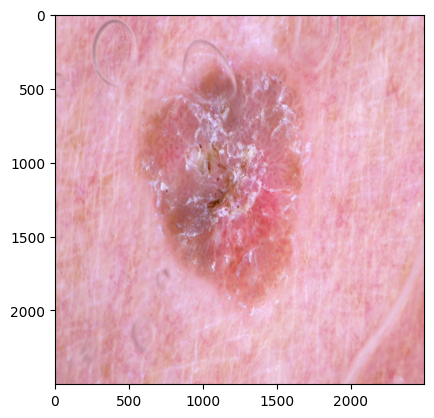

bkl


In [21]:
import cv2 as cv
path='./HAM10000_images'

count=0
for row in data.iterrows():
    img_name=row[1][0]
    i_name=img_name+'.jpg'
    PA=os.path.join(path,i_name)
    img_arr=cv.imread(PA,1)
    img_arr=cv.resize(img_arr,(2500,2500))
    img_arr=cv.cvtColor(img_arr,cv.COLOR_BGR2RGB)
    
    plt.imshow(img_arr)
    plt.show()
    print(row[1][1])

    count+=1
    if count==10:
        break

In [22]:
path='HAM10000_images'

image_value=[]
for row in data.iterrows():

    img_name=row[1][0]
    i_name=img_name+'.jpg'
    PA=os.path.join(path,i_name)
    img_arr=cv.imread(PA,1)
    img_arr=cv.resize(img_arr,(100,100))
    img_arr=cv.cvtColor(img_arr,cv.COLOR_BGR2RGB)
    image_value.append([img_arr,row[1][1]])

3.2 | Shuffling Images and Label Encoding

In [23]:
import random
random.shuffle(image_value)

In [24]:
X=[]
y=[]
for feature,label in image_value:
    X.append(feature)
    y.append(label)
len(X),len(y)

(9958, 9958)

In [25]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
y=lbl.fit_transform(y)
y.shape

(9958,)